In [8]:
from __future__ import print_function
import keras
from keras.datasets import fashion_mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.regularizers import l2
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# Defining the parameters
# batch, classes, epochs
batch_size = 128
num_classes = 10
epochs = 25

In [10]:
# Splitting the data between train and test
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

input_shape = (x_train.shape[1:] + (1,)) # (28, 28, 1)

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


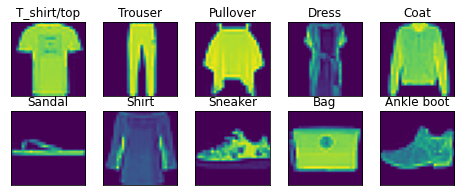

In [11]:
# plotting some random 10 images

class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = (features_idx[img_num,::])
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [12]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [13]:
# Printing sample data
print(y_train[:10])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [14]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [15]:
# summary of the model
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)       

In [16]:
# compile
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the input image
x_train /= 255
x_test /= 255


In [17]:
# train
history = model.fit(np.expand_dims(x_train, -1), y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_split=0.3,
              shuffle=True)

Epoch 1/25
329/329 [==============================] - 166s 504ms/step - loss: 8.1147 - accuracy: 0.7170 - val_loss: 8.2116 - val_accuracy: 0.5819
Epoch 2/25
329/329 [==============================] - 166s 504ms/step - loss: 6.8914 - accuracy: 0.8068 - val_loss: 6.4042 - val_accuracy: 0.8332
Epoch 3/25
329/329 [==============================] - 165s 503ms/step - loss: 6.0458 - accuracy: 0.8288 - val_loss: 5.5844 - val_accuracy: 0.8637
Epoch 4/25
329/329 [==============================] - 166s 505ms/step - loss: 5.3163 - accuracy: 0.8447 - val_loss: 4.9298 - val_accuracy: 0.8683
Epoch 5/25
329/329 [==============================] - 166s 504ms/step - loss: 4.6863 - accuracy: 0.8557 - val_loss: 4.4017 - val_accuracy: 0.8542
Epoch 6/25
329/329 [==============================] - 166s 506ms/step - loss: 4.1381 - accuracy: 0.8634 - val_loss: 3.8321 - val_accuracy: 0.8858
Epoch 7/25
329/329 [==============================] - 167s 509ms/step - loss: 3.6580 - accuracy: 0.8705 - val_loss: 3.3921 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


TypeError: ignored

313/313 [==============================] - 10s 31ms/step - loss: 0.5561 - accuracy: 0.9105
Test Accuracy : 0.910


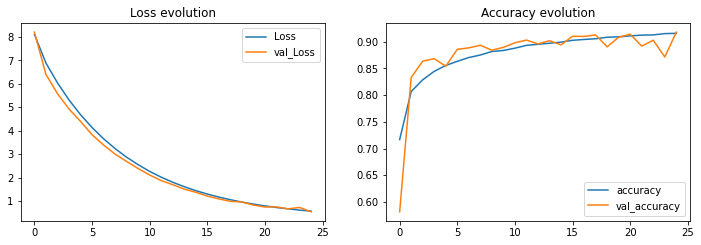

In [19]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

evaluation = model.evaluate(np.expand_dims(x_test, -1), y_test)
print(f'Test Accuracy : {evaluation[1]:.3f}')